In [3]:
#import library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#reading data
df=pd.read_csv(r'E:\Data Analyst\Data\Netflix\netflixData.csv')
#view data
print(df.head())
df.info()

                                Show Id                          Title  \
0  cc1b6ed9-cf9e-4057-8303-34577fb54477                       (Un)Well   
1  e2ef4e91-fb25-42ab-b485-be8e3b23dedb                         #Alive   
2  b01b73b7-81f6-47a7-86d8-acb63080d525  #AnneFrank - Parallel Stories   
3  b6611af0-f53c-4a08-9ffa-9716dc57eb9c                       #blackAF   
4  7f2d4170-bab8-4d75-adc2-197f7124c070               #cats_the_mewvie   

                                         Description  \
0  This docuseries takes a deep dive into the luc...   
1  As a grisly virus rampages a city, a lone man ...   
2  Through her diary, Anne Frank's story is retol...   
3  Kenya Barris and his family navigate relations...   
4  This pawesome documentary explores how our fel...   

                      Director  \
0                          NaN   
1                       Cho Il   
2  Sabina Fedeli, Anna Migotto   
3                          NaN   
4             Michael Margolis   

             

In [5]:
#drop duplicate and check null value
df.drop_duplicates(inplace=True)
df.isnull().sum()

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

In [143]:
#drop null value
df=df.drop(['Director','Date Added'], axis = 1)
df=df.dropna(subset=['Cast','Production Country','Release Date','Rating','Duration','Imdb Score'])

KeyError: "['Director' 'Date Added'] not found in axis"

In [16]:
#Check null value again
df.isnull().sum()

Show Id               0
Title                 0
Description           0
Genres                0
Cast                  0
Production Country    0
Release Date          0
Rating                0
Duration              0
Imdb Score            0
Content Type          0
dtype: int64

Movie      3279
TV Show    1562
Name: Content Type, dtype: int64


<AxesSubplot:title={'center':'Content Type on Netflix'}, ylabel='Content Type'>

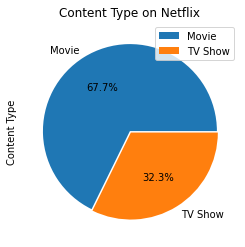

In [31]:
#Compare content type on Netflix
content_type = df['Content Type'].value_counts()
print(content_type)
content_type.plot(kind = 'pie',autopct='%1.1f%%',legend = True,explode=(0, 0.02),title='Content Type on Netflix')
plt.show()

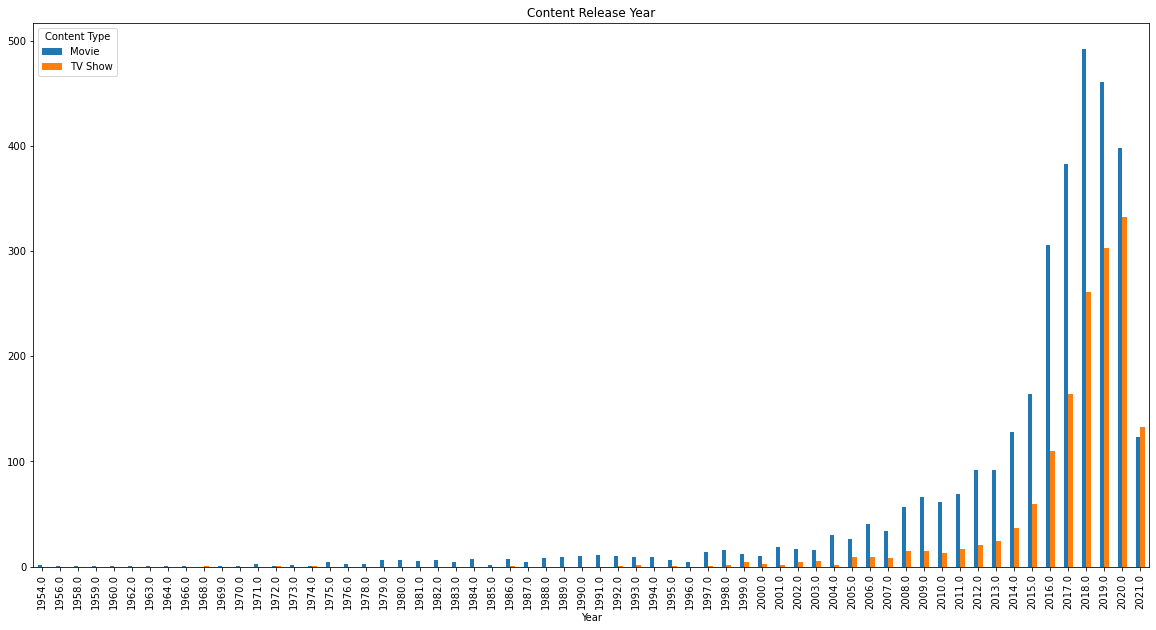

In [66]:
#Show release year and amount content
df['Release Date']=df['Release Date'].astype(str)
new_content = df.groupby(['Content Type','Release Date'])['Release Date'].count().unstack('Content Type')
new_content = new_content.sort_values(ascending = True, by = 'Release Date')
new_content.plot(kind='bar', title='Content Release Year',figsize=(20,10)).set_xlabel('Year')
plt.show()

In [71]:
#Check data in column 'Production Country'
print(df['Production Country'].value_counts())
#There are multiple countries in single columns 'Production Country' so we need create a new column that will contain only the first country
df['Official Country'] = df['Production Country'].str.split(',',expand = True)[0]
print(df['Official Country'].value_counts())

United States     1732
India              628
United Kingdom     313
Japan              224
South Korea        166
                  ... 
Soviet Union         1
Serbia               1
Zimbabwe             1
Luxembourg           1
Palestine            1
Name: Official Country, Length: 77, dtype: int64


                   Movie  TV Show   Total
Official Country                         
United States     1176.0    556.0  1732.0
India              598.0     30.0   628.0
United Kingdom     173.0    140.0   313.0
Japan               72.0    152.0   224.0
South Korea         32.0    134.0   166.0
...                  ...      ...     ...
Switzerland          2.0      NaN     NaN
Syria                1.0      NaN     NaN
Uruguay              7.0      NaN     NaN
Vietnam              4.0      NaN     NaN
Zimbabwe             1.0      NaN     NaN

[77 rows x 3 columns]


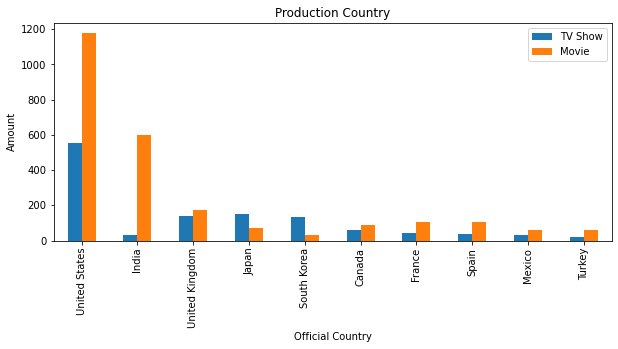

In [77]:
#Show amonut total content each country
country_group = df.groupby(['Content Type','Official Country'])['Official Country'].count().unstack('Content Type')
country_group.columns = ['Movie', 'TV Show']
country_group['Total'] = country_group['Movie']+country_group['TV Show']
country_group = country_group.sort_values(ascending = False, by = 'Total')
print(country_group)
country_group[:10].plot(kind = 'bar', title = 'Production Country', y =['TV Show','Movie'], figsize=(10,4)).set_ylabel('Amount')
plt.show()

         Movie  TV Show   Total
Rating                         
TV-MA   1334.0    776.0  2110.0
TV-14    827.0    408.0  1235.0
TV-PG    247.0    139.0   386.0
TV-Y7     41.0    105.0   146.0
TV-Y      50.0     88.0   138.0
TV-G      59.0     46.0   105.0
G         14.0      NaN     NaN
NC-17      1.0      NaN     NaN
PG       118.0      NaN     NaN
PG-13    218.0      NaN     NaN
R        370.0      NaN     NaN


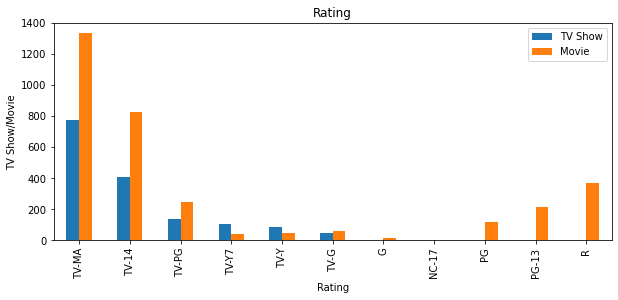

In [79]:
#Show total content each category raing
country_group = df.groupby(['Content Type','Rating'])['Rating'].count().unstack('Content Type')
country_group.columns = ['Movie', 'TV Show']
country_group['Total'] = country_group['Movie']+country_group['TV Show']
country_group = country_group.sort_values(ascending = False, by = 'Total')
print(country_group)
country_group.plot(kind = 'bar', title = 'Rating', y =['TV Show','Movie'], figsize=(10,4)).set_ylabel('TV Show/Movie')
plt.show()

In [83]:
#Show top film or tv show has high 'Imdb scrore'
df_topRated=df.loc[df['Imdb Score']>= '9.0/10',['Title','Official Country','Release Date','Imdb Score','Content Type']]
df_topRated=df_topRated.sort_values(ascending = False, by = 'Imdb Score')
print(df_topRated)

                                           Title Official Country  \
800                                 Breaking Bad    United States   
461                   Avatar: The Last Airbender    United States   
3572                                  Our Planet    United States   
3913                                  Reply 1988      South Korea   
4965                              The Last Dance    United States   
1208    David Attenborough: A Life on Our Planet    United States   
2701                            Leyla and Mecnun           Turkey   
5280                                 The Untamed            China   
444                              Attack on Titan            Japan   
740                           Bo Burnham: Inside    United States   
1738            Fullmetal Alchemist: Brotherhood            Japan   
2155                      Hunter X Hunter (2011)            Japan   
2652  Leah Remini: Scientology and the Aftermath    United States   
3292                              

In [84]:
#Show top film or tv show has low 'Imdb scrore'
df_lowRated=df.loc[df['Imdb Score'] <= '2.0/10',['Title','Official Country','Release Date','Imdb Score','Content Type']]
df_lowRated=df_lowRated.sort_values(ascending = True, by = 'Imdb Score')
print(df_lowRated)

                            Title      Official Country Release Date  \
209                       Aerials  United Arab Emirates       2016.0   
5396                Time to Dance                 India       2020.0   
2064                   Himmatwala                 India       2013.0   
63                          5Gang               Romania       2019.0   
1143  Cross: Rise of the Villains         United States       2019.0   
115             A House of Blocks                Taiwan       2017.0   

     Imdb Score Content Type  
209      1.3/10        Movie  
5396     1.7/10        Movie  
2064     1.8/10        Movie  
63       1.9/10        Movie  
1143     1.9/10        Movie  
115      2.0/10      TV Show  


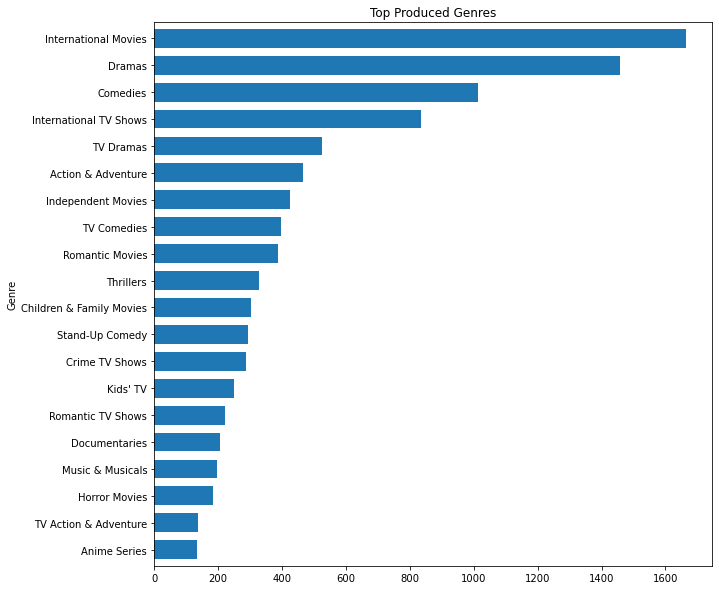

In [142]:
#Check data in 'Genres' columns
print(df['Genres'].value_counts())
#There're maybe multiple genres in each content so that we need split genres and statistic them 
genres = ", ".join(df['Genres']).split(', ')
#print(genres)
from collections import Counter
cnt = Counter()
for genre in genres:
    cnt[genre] +=1
#Select top 20 genres produced the most
top_genres = cnt.most_common(20)
df_top_genres = pd.DataFrame(data = top_genres, columns=['Genre','Count'])
df_top_genres.sort_values(ascending = True, by = 'Count', inplace = True)
df_top_genres.plot.barh(x='Genre',title ='Top Produced Genres',width=0.7,legend = False, figsize=(10,10))
plt.show()